In [0]:
!wget -O "TP1_IDM.zip" "https://d1b10bmlvqabco.cloudfront.net/attach/iw3gqpakkwgvi/ipfm8cpei955q1/izlouk8zkmis/TP1_IDM.zip"

--2020-03-30 22:11:06--  https://d1b10bmlvqabco.cloudfront.net/attach/iw3gqpakkwgvi/ipfm8cpei955q1/izlouk8zkmis/TP1_IDM.zip
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 13.224.162.194, 13.224.162.70, 13.224.162.4, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|13.224.162.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444752 (434K) [application/zip]
Saving to: ‘TP1_IDM.zip’

TP1_IDM.zip         100%[===================>] 434.33K  --.-KB/s    in 0.1s    

2020-03-30 22:11:06 (4.21 MB/s) - ‘TP1_IDM.zip’ saved [444752/444752]



In [0]:
!unzip TP1_IDM.zip

unzip:  cannot find or open TP1_IDM.zip, TP1_IDM.zip.zip or TP1_IDM.zip.ZIP.


In [0]:
#importation des libraries 
import cv2 as cv
from skimage import data
import imutils
import matplotlib.pyplot as plt
import os
import numpy as np

In [0]:
#fonction pour charger les images
def load_images(data_dir):
  # two lists, labels and images.
  index = []
  images = []
    
  file_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".jpg")]
  for f in file_names:
          images.append(cv.imread(f))
  return images

In [0]:
#les chemins pour les images ref et les images test + chargement des images à l'aide de la fonction load_images
path_ref = "/content/TP1_IDM/imgColor/ref"
images_ref = load_images(path_ref)
path_test = "/content/TP1_IDM/imgColor/test"
images_test = load_images(path_test)

In [0]:
#fonction pour afficher les images
def display_images(images):
    fig=plt.figure(figsize=(20,10))
    for i in range(len(images)):
        fig.add_subplot(1,len(images),i+1)
        plt.axis('off')
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.show()

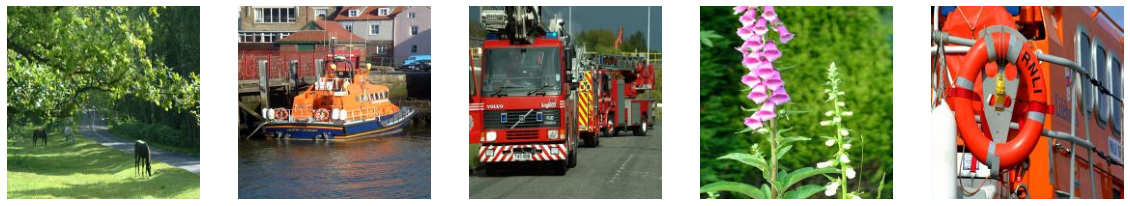

In [0]:
#affichage des images de référence
display_images(images_ref)

In [0]:
#acces aux pixels des images
print(images_ref[1].item(10,10,0)) #rouge
print(images_ref[1].item(10,10,1)) #vert
print(images_ref[1].item(10,10,2)) #bleu

115
142
152


In [0]:
def hist(img, histSize = 256, histRange = (0, 256), accumulate = False):
  bgr_planes = cv.split(img)
  b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate = accumulate)
  g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate = accumulate)
  r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate = accumulate)
  return np.array([b_hist, g_hist, r_hist])

In [0]:
#dictionnaire d'histogrames
histo_ref = {}

In [0]:
#calcul des histogrammes
for i in range(len(images_ref)):
  histo_ref[i] = hist(images_ref[i])

In [0]:
#la fonction distance entre deux histogrammes
def dist(histo1, histo2):
  return 1 - np.sum(np.minimum(histo1, histo2)) / np.minimum(np.sum(histo1), np.sum(histo2))

In [0]:
index = histo_ref

In [0]:
#resultats de la distance selon chaque image
results = dict.fromkeys(list(index.keys()) , 0)
# image of image query
q=input('tape the number of query image  0 to 4 : ')
q=int(q)
hist_query = hist(images_test[q])
for (k, h) in index.items():
    results[k] = dist(hist_query, h)
results = sorted([(v, k) for (k, v) in results.items()], reverse = False)

tape the number of query image  0 to 4 : 0


In [0]:
#les chemins pour les images ref et les images test + chargement des images à l'aide de la fonction load_images
path_ref = "/content/TP1_IDM/imgTexture/ref"
images_ref = load_images(path_ref)
path_test = "/content/TP1_IDM/imgTexture/test"
images_test = load_images(path_test)

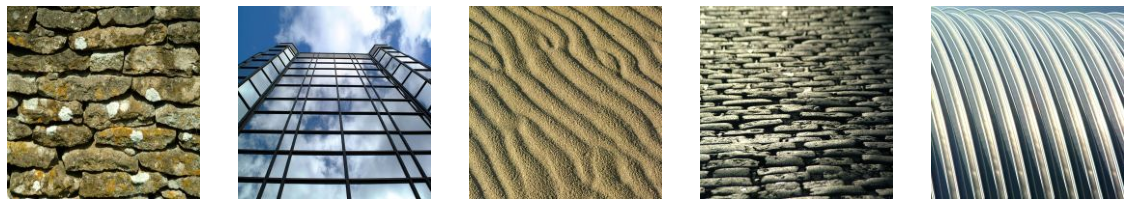

In [0]:
#affichage des images de référence
display_images(images_ref)

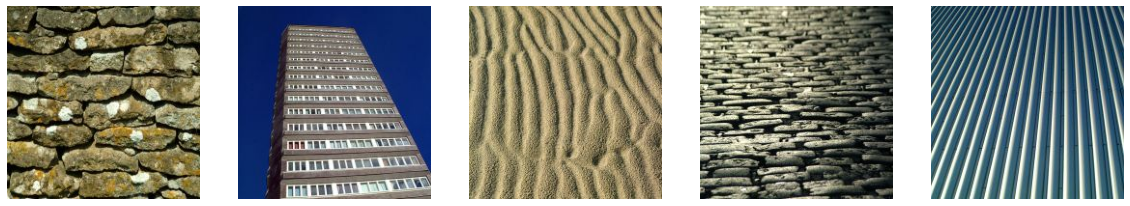

In [0]:
#affichage des images de référence
display_images(images_test)

In [0]:
#calcule de la matrice de co-occurence
def comatrix(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)